In [78]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

from pandas import DataFrame
from numpy import array

nf1 = pd.read_csv('sales_train.csv')
nf2 = pd.read_csv('items.csv')

from datetime import datetime
nf6 = pd.merge(nf1,nf2).drop(['item_name'], axis=1)


nf6['item_sale'] = nf6.item_price*nf6.item_cnt_day

nf9 = nf6.groupby(["date","item_category_id"]).sum().reset_index()
nf9 = nf9.drop(['date_block_num','item_id','item_price','item_cnt_day','shop_id'],axis=1)
nf9['date'] = pd.to_datetime(nf9['date'], format="%d.%m.%Y")
nf9 = nf9.sort_values(by='date')

nf10 = pd.pivot_table(nf9, values='item_sale',index=['date'],columns=['item_category_id'],aggfunc=np.sum,fill_value=0)
nf10['total_sale'] = nf10.sum(axis=1)
nf10

#Dataset containing each item_category_id as columns,date as rows, and a total sale of the day column at last

item_category_id,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,total_sale
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0.0,0,59210.68,3235.66,5353.0,8647.30,20769.0,0.0,0.0,0.0,...,32224.50,0.0,696.0,0,499.0,0.0,79,447.0,2580.00,1362942.00
2013-01-02,0.0,0,214170.02,20455.24,21972.0,47024.08,119270.6,0.0,0.0,0.0,...,187538.00,0.0,5554.0,0,3593.0,0.0,1871,2522.0,10122.87,6020512.03
2013-01-03,0.0,0,164285.00,15711.00,20409.0,57932.14,62046.5,0.0,0.0,0.0,...,210710.80,0.0,5693.0,0,599.0,0.0,951,1023.0,5546.00,5436480.11
2013-01-04,0.0,0,146496.51,11205.00,18681.5,34044.70,69670.0,0.0,0.0,0.0,...,262702.00,0.0,2985.0,0,3393.0,0.0,1568,1814.0,3013.00,4755664.00
2013-01-05,0.0,0,142757.02,11447.00,14820.0,46100.10,55896.0,0.0,0.0,0.0,...,157989.70,0.0,3792.0,0,3623.0,0.0,1989,1662.0,3294.00,4587231.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-10-27,0.0,0,6780.00,48723.00,0.0,1897.00,11229.0,15750.0,0.0,2944.0,...,56301.00,12664.0,0.0,216,16844.0,0.0,0,0.0,477.00,2261143.13
2015-10-28,0.0,0,11868.00,34802.00,0.0,499.00,7850.0,20553.0,0.0,7824.0,...,19934.79,7263.0,0.0,400,13937.0,0.0,0,0.0,1488.00,1722150.10
2015-10-29,0.0,0,698.00,70403.00,0.0,0.00,22620.0,6468.0,0.0,4903.0,...,31703.69,5490.0,199.0,416,9684.0,0.0,0,0.0,774.00,1859613.14


In [79]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
from pandas import concat
from numpy import concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from math import sqrt

import warnings
warnings.filterwarnings('ignore')

# convert series to supervised learning function
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# load dataset

values = nf10.values

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.iloc[:,85:169], axis=1, inplace=True)
print(reframed.head())


   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1        0.0        0.0   0.144021   0.002849   0.253783   0.164991   
2        0.0        0.0   0.501037   0.018008   1.000000   0.815190   
3        0.0        0.0   0.386105   0.013832   0.929819   1.000000   
4        0.0        0.0   0.345122   0.009865   0.852252   0.595287   
5        0.0        0.0   0.336506   0.010078   0.678865   0.799536   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  ...  var77(t-1)  var78(t-1)  \
1   0.078637   0.009186   0.009406         0.0  ...         0.0    0.137610   
2   0.474259   0.009186   0.009406         0.0  ...         0.0    0.584775   
3   0.244424   0.009186   0.009406         0.0  ...         0.0    0.597570   
4   0.275043   0.009186   0.009406         0.0  ...         0.0    0.348306   
5   0.219721   0.009186   0.009406         0.0  ...         0.0    0.422588   

   var79(t-1)  var80(t-1)  var81(t-1)  var82(t-1)  var83(t-1)  var84(t-1)  \
1         0.0    0.00

(828, 1, 85) (828,) (205, 1, 85) (205,)
Train on 828 samples, validate on 205 samples
Epoch 1/32
 - 3s - loss: 0.0518 - val_loss: 0.0464
Epoch 2/32
 - 0s - loss: 0.0446 - val_loss: 0.0342
Epoch 3/32
 - 0s - loss: 0.0416 - val_loss: 0.0272
Epoch 4/32
 - 0s - loss: 0.0399 - val_loss: 0.0246
Epoch 5/32
 - 0s - loss: 0.0375 - val_loss: 0.0236
Epoch 6/32
 - 0s - loss: 0.0341 - val_loss: 0.0230
Epoch 7/32
 - 0s - loss: 0.0311 - val_loss: 0.0225
Epoch 8/32
 - 0s - loss: 0.0301 - val_loss: 0.0221
Epoch 9/32
 - 0s - loss: 0.0305 - val_loss: 0.0221
Epoch 10/32
 - 0s - loss: 0.0303 - val_loss: 0.0228
Epoch 11/32
 - 0s - loss: 0.0298 - val_loss: 0.0240
Epoch 12/32
 - 0s - loss: 0.0296 - val_loss: 0.0243
Epoch 13/32
 - 0s - loss: 0.0291 - val_loss: 0.0235
Epoch 14/32
 - 0s - loss: 0.0282 - val_loss: 0.0218
Epoch 15/32
 - 0s - loss: 0.0274 - val_loss: 0.0206
Epoch 16/32
 - 0s - loss: 0.0271 - val_loss: 0.0199
Epoch 17/32
 - 0s - loss: 0.0267 - val_loss: 0.0197
Epoch 18/32
 - 0s - loss: 0.0261 - val_

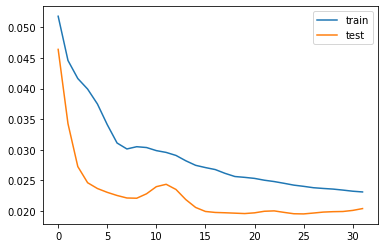

Test RMSE: 1673873.857


In [85]:
# split into train and test sets
values = reframed.values

train = values[:828, :]
test = values[828:1034, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)



# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=32, batch_size=512, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((test_X[:, 1:],yhat), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,84]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate(( test_X[:, 1:],test_y), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,84]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)



In [86]:
#Mean absolute error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(inv_y, inv_yhat)

719965.2281441876

In [87]:
#Mean Absolute percentage error
MAPE = np.mean(np.abs((inv_y - inv_yhat) / inv_y))*100
MAPE

21.754367372598605

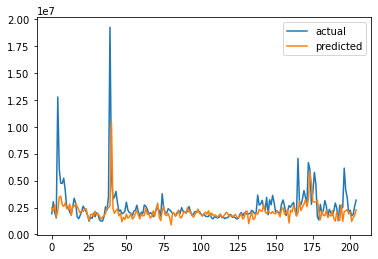

In [88]:
pyplot.plot(inv_y, label='actual')
pyplot.plot(inv_yhat, label='predicted')
pyplot.legend()
pyplot.show()